## Parcial 

## Punto 1

In [62]:
#Clientes nuevos
from scipy.stats import poisson,expon, gamma, uniform, weibull_min, beta

def cliente_nuevos():
    n_items = poisson(mu=20)
    n_times = expon(scale=5)
    total_compra = gamma(a=3, loc=10)
    return n_items.rvs(), n_times.rvs(), total_compra.rvs()

def cliente_frecuente():
    n_itesm_frecuentes = poisson(mu=10)
    n_times_frecuentes = expon(scale=3)
    total_compra_frecuentes = uniform(loc=60, scale=120) #Miles de pesos
    return n_itesm_frecuentes.rvs(), n_times_frecuentes.rvs(), total_compra_frecuentes.rvs()

def cliente_esporadico():
    n_items_esporadicos = uniform(loc=3, scale=7)
    n_times_esporadicos = weibull_min(2,loc=5)
    total_compra_esporadicos = beta(a=2, b=3, loc=40) #Miles de pesos
    return n_items_esporadicos.rvs(), n_times_esporadicos.rvs(), total_compra_esporadicos.rvs()


num_simulaciones = 10000

clientes_nuevos = []
clientes_frecuentes = []
clientes_esporadicos = []

for i in range(num_simulaciones):
    clientes_nuevos.append(cliente_nuevos())
    clientes_frecuentes.append(cliente_frecuente())
    clientes_esporadicos.append(cliente_esporadico())
    




## Clientes 

In [75]:
#conver clientes nuevos a dataframe
import pandas as pd
import matplotlib.pyplot as plt

df_clientes_nuevos = pd.DataFrame(clientes_nuevos, columns=['n_items', 'n_times', 'total_compra'])
df_clientes_frecuentes = pd.DataFrame(clientes_frecuentes, columns=['n_items', 'n_times', 'total_compra'])
df_clientes_esporadicos = pd.DataFrame(clientes_esporadicos, columns=['n_items', 'n_times', 'total_compra'])

#print descriptive statistics for n_items
print(df_clientes_nuevos['n_items'].describe())
print(df_clientes_frecuentes['n_items'].describe())
print(df_clientes_esporadicos['n_items'].describe())




count    10000.000000
mean        20.021900
std          4.484421
min          6.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         44.000000
Name: n_items, dtype: float64
count    10000.000000
mean        10.005200
std          3.133457
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_items, dtype: float64
count    10000.000000
mean         6.465068
std          2.020134
min          3.000542
25%          4.710412
50%          6.445879
75%          8.206793
max          9.998686
Name: n_items, dtype: float64


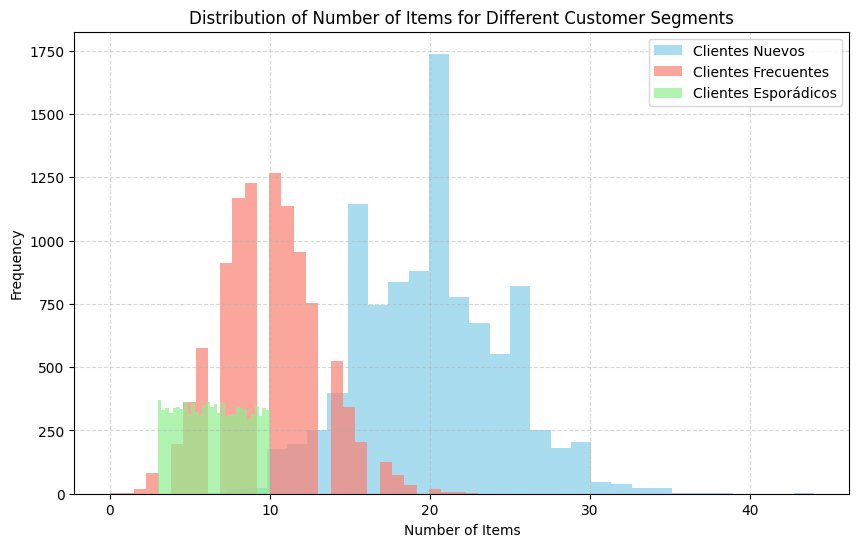

In [64]:
import matplotlib.pyplot as plt

# Set up a color palette
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot the histogram for n_items in each dataframe
plt.figure(figsize=(10, 6))

plt.hist(df_clientes_nuevos['n_items'], bins=30, alpha=0.7, color=colors[0], label='Clientes Nuevos')
plt.hist(df_clientes_frecuentes['n_items'], bins=30, alpha=0.7, color=colors[1], label='Clientes Frecuentes')
plt.hist(df_clientes_esporadicos['n_items'], bins=30, alpha=0.7, color=colors[2], label='Clientes Esporádicos')

# Add labels and title
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Items for Different Customer Segments')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Para los clientes nuevos, notamos que la distribución sigue una distribución de Poisson con una media de 20. Esto se evidencia claramente en la gráfica azul, donde los datos se centran alrededor de 20.

En el caso de los clientes frecuentes, la situación es diferente. Sus compras siguen también una distribución de Poisson, pero con una tasa (lambda) de 10. Esto se refleja en la gráfica roja, donde la concentración de datos se encuentra alrededor de 10. La comparación entre las dos distribuciones sugiere que los clientes frecuentes, en promedio, compran menos artículos en cada visita en comparación con los clientes nuevos.

Por último, para los clientes esporádicos, la distribución es representada por la gráfica verde. Aquí, la variable sigue una distribución uniforme en el rango de 3 a 7. Esto indica que la cantidad de artículos comprados por los clientes esporádicos puede variar en un rango más estrecho en comparación con los clientes nuevos y frecuentes.

En general, estas observaciones sugieren que los clientes nuevos tienden a visitar y comprar más artículos en comparación con los clientes frecuentes, mientras que los clientes esporádicos muestran una variabilidad más limitada en sus compras. Estas tendencias son valiosas para la empresa, ya que proporcionan información clave sobre el comportamiento de compra de diferentes segmentos de clientes.

## Percentil 99 Para cada tipo de cliente

In [65]:
#calculate the percentil 99 of the n_times
print(df_clientes_nuevos['n_times'].quantile(0.99))
print(df_clientes_frecuentes['n_times'].quantile(0.99))
print(df_clientes_esporadicos['n_times'].quantile(0.99))



22.257079751125236
13.943093061922628
7.167863656715273


Además, analizamos la probabilidad de que los valores sean menores al considerar el 99 por ciento de los datos. En este contexto, notamos que los clientes nuevos, clientes frecuentes y clientes esporádicos muestran las probabilidades más bajas de tener valores inferiores en comparación con otras categorías.

## Punto 2

In [69]:
import random
import pandas as pd
from scipy.stats import poisson, expon, gamma, uniform, weibull_min, beta

def generate_cliente_nuevos():
    n_items = poisson(mu=20)
    n_times = expon(scale=5)
    total_compra = gamma(a=3, loc=10)
    return n_items.rvs(), n_times.rvs(), total_compra.rvs()

def generate_cliente_frecuente():
    n_items_frecuentes = poisson(mu=10)
    n_times_frecuentes = expon(scale=3)
    total_compra_frecuentes = uniform(loc=60, scale=120)  # Miles de pesos
    return n_items_frecuentes.rvs(), n_times_frecuentes.rvs(), total_compra_frecuentes.rvs()

def generate_cliente_esporadico():
    n_items_esporadicos = uniform(loc=3, scale=7)
    n_times_esporadicos = weibull_min(2, loc=5)
    total_compra_esporadicos = beta(a=2, b=3, loc=40)  # Miles de pesos
    return n_items_esporadicos.rvs(), n_times_esporadicos.rvs(), total_compra_esporadicos.rvs()

def tiempo_total_probability():
    probabilidad = random.uniform(0, 1)
    if probabilidad < 0.3:
        return generate_cliente_nuevos()
    elif 0.3 <= probabilidad < 0.7:
        return generate_cliente_frecuente()
    else:
        return generate_cliente_esporadico()

num_simulaciones = 10000

# Create a DataFrame to store the results
punto_2_df = pd.DataFrame([tiempo_total_probability() for i in range(num_simulaciones)],
                          columns=['n_items', 'n_times', 'total_compra'])




## Histograma Tiempo total Punto 2

Text(0.5, 1.0, 'Distribution of Number of Times for Different Customer Segments')

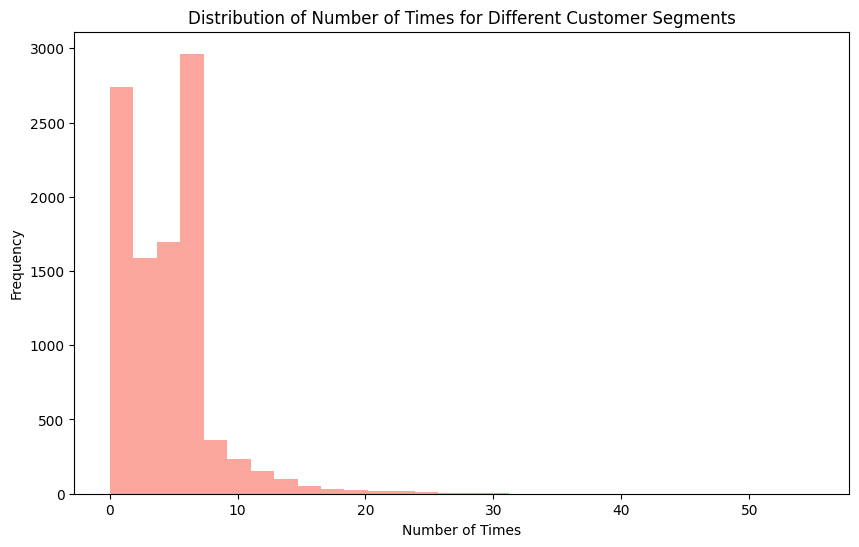

In [70]:
# Plot the histogram for n_times
plt.figure(figsize=(10, 6))
plt.hist(punto_2_df['n_times'], bins=30, alpha=0.7, color='salmon')
plt.xlabel('Number of Times')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Times for Different Customer Segments')


In [71]:
punto_2_df['n_times'].describe()

count    10000.000000
mean         4.446959
std          3.462742
min          0.001120
25%          1.631312
50%          4.793815
75%          6.011930
max         55.069183
Name: n_times, dtype: float64

Observamos que la media del tiempo total es 4.47, con una desviación estándar de 3.62. Estos valores indican una notable variación en los datos. La disminución en el tiempo esperado se debe a la asignación de una mayor probabilidad a los clientes frecuentes. Sin embargo, la considerable variabilidad persiste, destacando la presencia de valores notoriamente grandes, como el caso del 55, que representa el valor máximo observado. Esta variabilidad se ve acentuada por la combinación de las tres variables aleatorias, lo cual contribuye a la amplia gama de resultados observados.

## Punto 3

In [72]:
punto_2_df['total_compra'].describe()


count    10000.000000
mean        63.351472
std         51.180728
min         10.108544
25%         14.575746
50%         40.471595
75%        103.193551
max        179.991322
Name: total_compra, dtype: float64

## Gráfica de Histograma

Text(0.5, 1.0, 'Distribution of Total Purchase for Different Customer Segments')

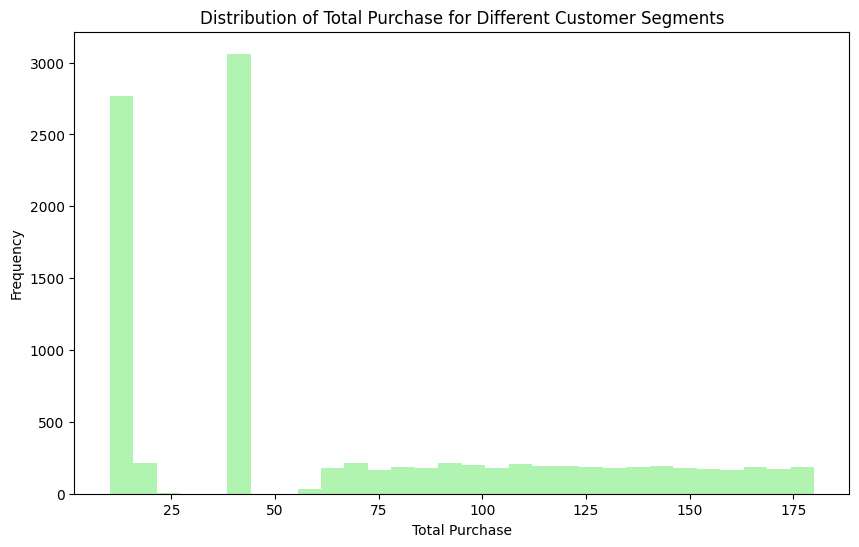

In [73]:
# Plot the histogram for total_compra
plt.figure(figsize=(10, 6))
plt.hist(punto_2_df['total_compra'], bins=30, alpha=0.7, color='lightgreen')
plt.xlabel('Total Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Total Purchase for Different Customer Segments')


En el gráfico, se distinguen claramente tres tipos de usuarios y sus respectivas distribuciones. Notamos que los usuarios frecuentes destacan como los mayores compradores, ya que tienen una probabilidad de compra significativamente mayor, específicamente del 40 por ciento en comparación con otros segmentos(además de su distribución uniforme de 60 a 120 miles de pesos). Por otro lado, observamos que los otros usuarios,tienden a adquirir productos de menor valor en comparación con los clientes frecuentes.

En resumen, los usuarios que realizan compras de mayor cuantía, medidas en miles de pesos, son principalmente los usuarios frecuentes, siendo estos la fuente principal de ingresos para la empresa. Les siguen en importancia los compradores esporádicos y, finalmente, los compradores nuevos. A pesar de que los compradores nuevos dedican más tiempo a explorar anuncios, se observa que son los que menos compran en términos de valor monetario.